<a href="https://colab.research.google.com/github/JesusCasas024/Perceptron-Implementation/blob/main/Activity_Perceptron_JECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

The perceptron is an artificial neuron based on the human brain that is looked for working as just as human neuron does, the unity of the perceptron can be also seen as the first neural network, a neural network that functions with one single layer, being then a linear/binary classificator giving only the result of 2 classes, 0 or 1. Therefore, the perceptron is a learning algorithm that makes the neurons being able to learn features and patters and process in the training phase. It is limited because only has one layer with one neuron to process the data and an entrance layer for the input data.

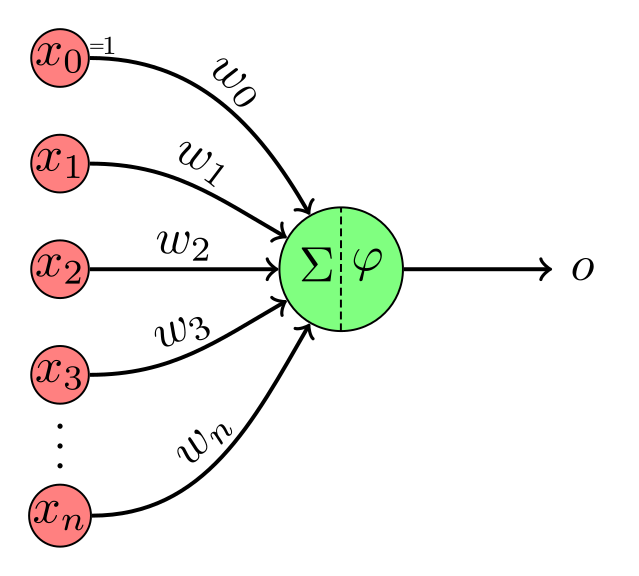

Because of the nature of the neural network, the perceptron works with an activation function in the neuron, this activation functions helps the neuron to learn complex patterns and decides the output of the neuron. It also uses the loss function because of its necessity to perform the training with the adjustment of weights and parameters.

#Pseudocodigo

1. Load and Preprocess Data:
   - Load the dataset.
   - Handle missing values if any.
   - Set Datetime column as the index.
   - Select relevant columns: 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'.
   - Normalize input features and target variable using MinMaxScaler.

2. Create TensorFlow Dataset:
   - Create a TensorFlow Dataset from the preprocessed data.
   - Shuffle, batch, and repeat the dataset indefinitely for training.

3. Build the Neural Network Model:
   - Initialize a sequential neural network model.
   - Add a dense layer with one unit and linear activation function.
   - Compile the model with mean squared error as the loss function and Adam optimizer.

4. Train the Model:
   - Specify the number of epochs and steps per epoch.
   - Train the model using the TensorFlow Dataset for the specified epochs and steps per epoch.
   - Monitor training and validation loss during the training process.

5. Evaluate the Model:
   - Evaluate the trained model on the test dataset.
   - Use the error values for the performance metrics.

6. Make Predictions:
   - Make predictions on test samples.
   - Get the actual values.
   - Print the actual and predicted values for the selected samples.

7. Visualize Training and Validation Loss:
   - Plot the training and validation loss over epochs to visualize the model's training progress.

8. End


#Code application
Prediction for the energy consumption of a house.

Epoch 1/30
81/81 [==============================] - 33s 370ms/step - loss: 0.3264 - mse: 0.3264 - val_loss: 0.2523 - val_mse: 0.2523
Epoch 2/30
81/81 [==============================] - 25s 314ms/step - loss: 0.1967 - mse: 0.1967 - val_loss: 0.1472 - val_mse: 0.1472
Epoch 3/30
81/81 [==============================] - 24s 304ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.0810 - val_mse: 0.0810
Epoch 4/30
81/81 [==============================] - 28s 345ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 5/30
81/81 [==============================] - 27s 336ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 6/30
81/81 [==============================] - 23s 293ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 7/30
81/81 [==============================] - 23s 282ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 8/30
81/81 [==============================] - 19s 227ms/step - 

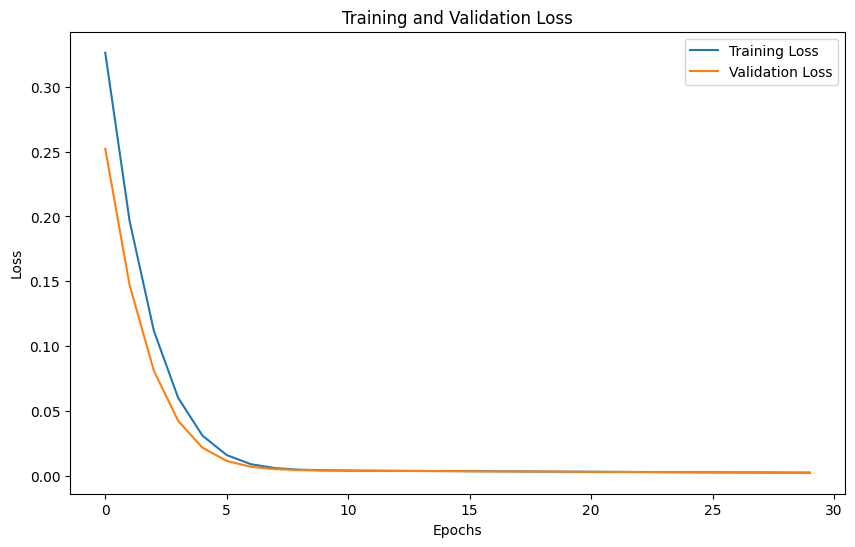

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                   infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

# Drop rows with missing values in any column
data = data.dropna()

# Set Datetime column as index
data.set_index('Datetime', inplace=True)

# Use most relevant data columns for the data
data = data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]

# Define input features and target variable
X = data[['Global_active_power', 'Global_reactive_power', 'Voltage']].values
y = data['Global_intensity'].values

# Normalize the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Standarize the target variable (Global_intensity)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Number of elements in the training epoch
batch_size = 20000

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Shuffle and batch the dataset.
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size).repeat()

# Calculate the number of steps (batches) per epoch
steps_per_epoch = len(X_train) // batch_size

# Perceptron model
model = Sequential([
    Dense(units=1, input_shape=(X_train.shape[1],), activation='linear')
])

# Compile the model with loss function in metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# number of epochs
num_epochs = 30
# Train the model
history = model.fit(train_dataset, epochs=num_epochs, steps_per_epoch=steps_per_epoch,
                    validation_data=(X_test, y_test), verbose=1)


# Evaluate the model on the test data
loss, mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on Test Data: {mse}')

# Predictions over 10 sample elements
num_samples_to_predict = 10
sample_indices = np.random.choice(X_test.shape[0], num_samples_to_predict, replace=False)
predicted_values = model.predict(X_test[sample_indices])

#get the actual values
y_test_actual = scaler_y.inverse_transform(y_test[sample_indices])
predicted_values_actual = scaler_y.inverse_transform(predicted_values)

# Print the actual and predicted values for the selected samples
for i in range(num_samples_to_predict):
    print(f'Sample {i + 1} - Actual: {y_test_actual[i][0]}, Predicted: {predicted_values_actual[i][0]}')

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#Activation function
activation='linear' (linear activation function)
#Loss function
loss='mean_squared_error'  (mean_squared_error function)